<strong>Dataset Overview for Credit Card Fraud Prediction</strong>

This project aims to analyze transaction data and build a machine learning model to detect fraudulent activities. Using a dataset containing transaction details, we will uncover patterns and factors contributing to fraud and evaluate methods to improve detection accuracy.

The dataset contains 555,719 instances and 22 attributes, covering both categorical and numerical data types. It includes details about cardholders, merchants, transaction amounts, and geolocations. The target variable, is_fraud, indicates whether a transaction is fraudulent or legitimate, making it an ideal resource for supervised learning and fraud detection analysis.

This dataset provides an opportunity to build models, uncover patterns, and gain insights into factors contributing to fraudulent activities. Its completeness and diversity make it ideal for supervised learning tasks such as classification.


<strong>Importing Our Libraries</strong>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

<strong>Importing Our Dataset</strong>

In [5]:
df = pd.read_csv('fraud test.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


<strong>EDA (Exploratory Data Analysis)</strong>

In [7]:
print(f"""Shape: {df.shape}
Size: {df.size}
Dimention: {df.ndim}\n
""")

Shape: (555719, 23)
Size: 12781537
Dimention: 2




In [8]:
df.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,226976,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,15/12/2020 21:26,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,23/03/1977,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,16,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800430e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521420e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635330e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
# Checking for missing values
missing_data = df.isnull().values.any()

if not missing_data:  # If there are no missing values
    print(missing_data)

False


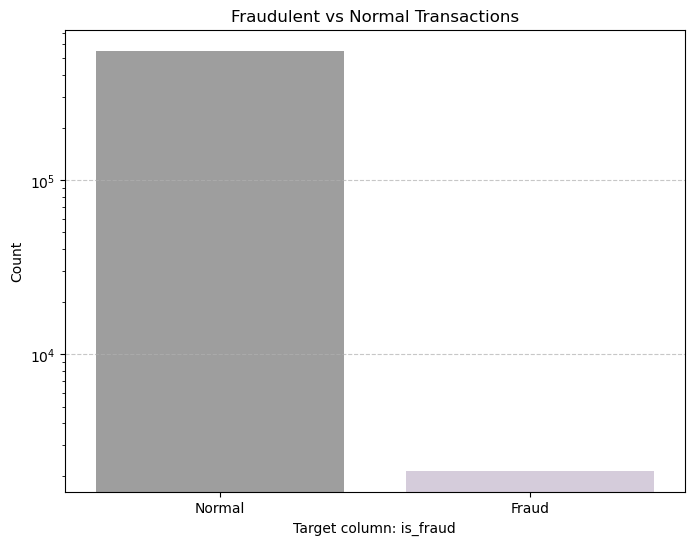

In [11]:
#countplot
colors = ['#9e9e9e', '#D6CADD']

plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df, palette=colors)
plt.yscale('log')
plt.title('Fraudulent vs Normal Transactions')
plt.xlabel('Target column: is_fraud')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()


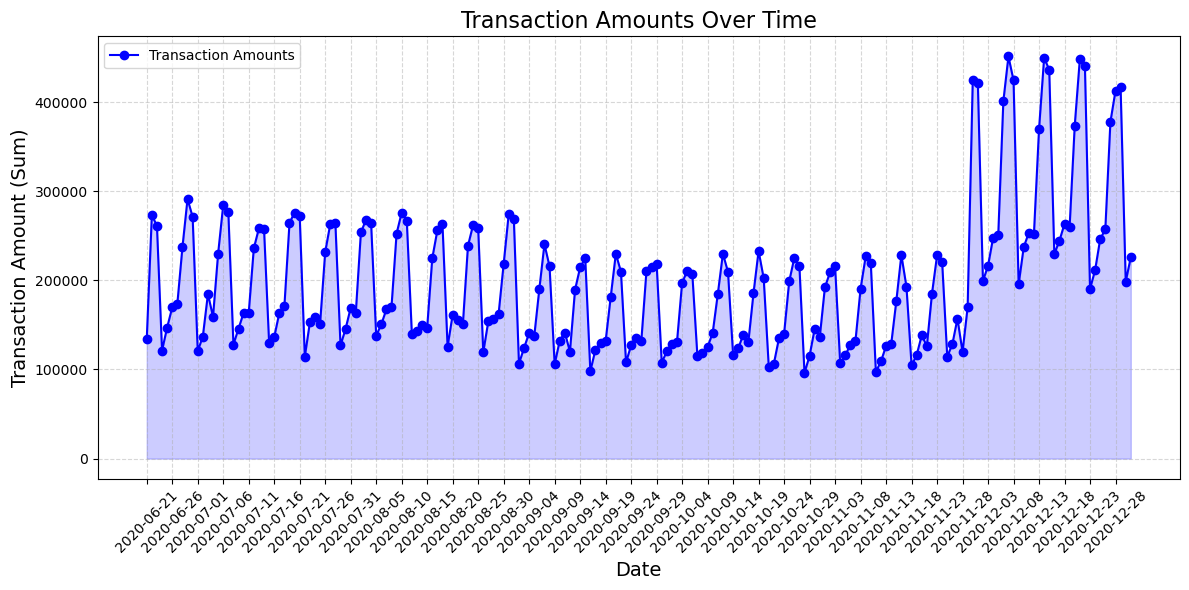

In [12]:
#line graph
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

data_grouped = df.groupby(df['trans_date_trans_time'].dt.date)['amt'].sum()

x = np.arange(len(data_grouped))  
y = data_grouped.values
x_labels = data_grouped.index  # Actual dates for x-axis labels

plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', color='blue', label='Transaction Amounts')
plt.fill_between(x, y, alpha=0.2, color='blue')  # Add shading for better visualization

plt.title('Transaction Amounts Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Transaction Amount (Sum)', fontsize=14)
plt.xticks(ticks=x[::5], labels=x_labels[::5], rotation=45, fontsize=10)  # Show fewer dates for clarity
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


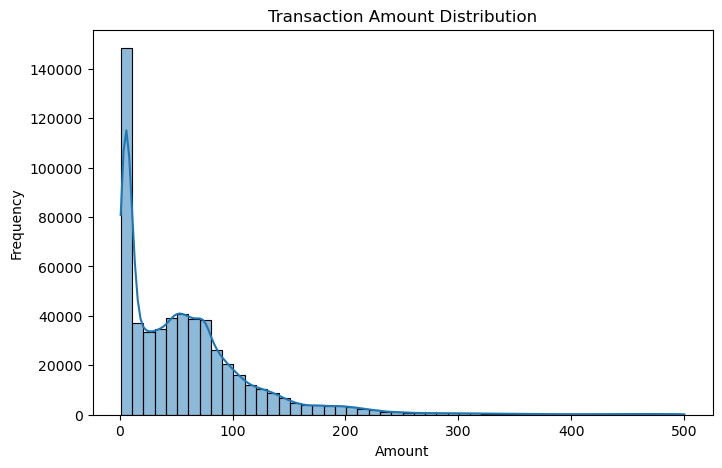

In [13]:
#histogram
plt.figure(figsize=(8, 5))
sns.histplot(df[df['amt'] <= 500]['amt'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

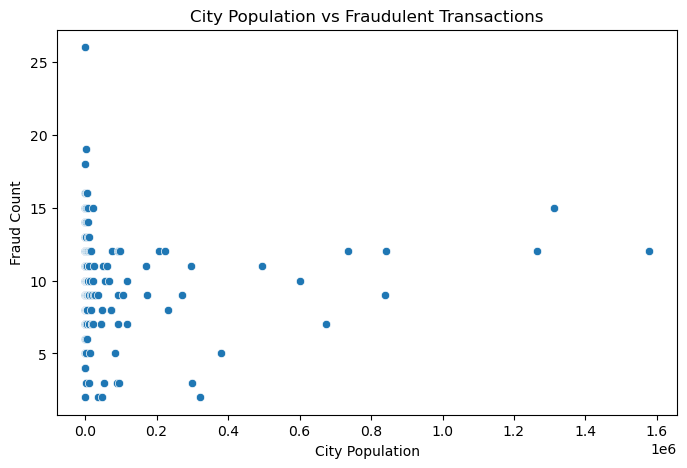

In [14]:
#scatter plot
fraud_by_city = df[df['is_fraud'] == 1].groupby('city_pop').size().reset_index(name='Fraud_Count')
plt.figure(figsize=(8, 5))
sns.scatterplot(data=fraud_by_city, x='city_pop', y='Fraud_Count')
plt.title('City Population vs Fraudulent Transactions')
plt.xlabel('City Population')
plt.ylabel('Fraud Count')
plt.show()

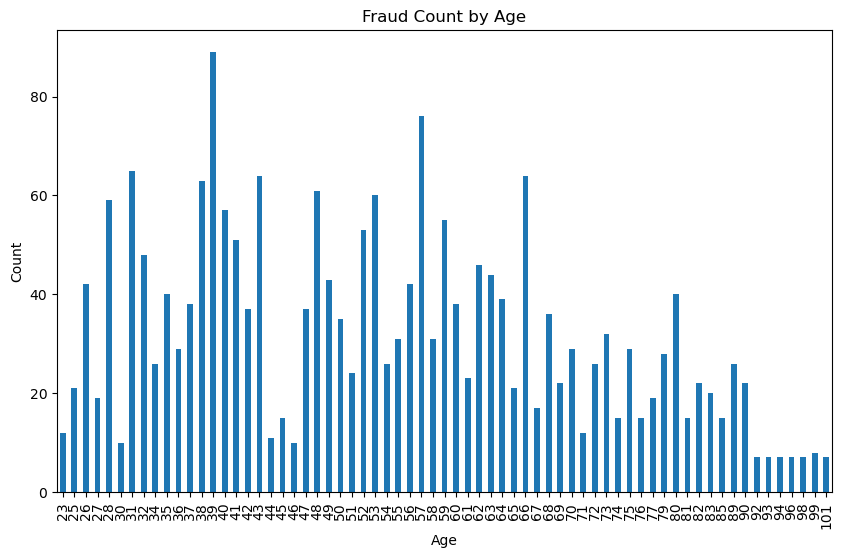

In [15]:
#bar plot
from datetime import datetime

df['age'] = datetime.now().year - pd.to_datetime(df['dob']).dt.year
age_fraud = df[df['is_fraud'] == 1].groupby('age').size()
age_fraud.plot(kind='bar', figsize=(10, 6))
plt.title('Fraud Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

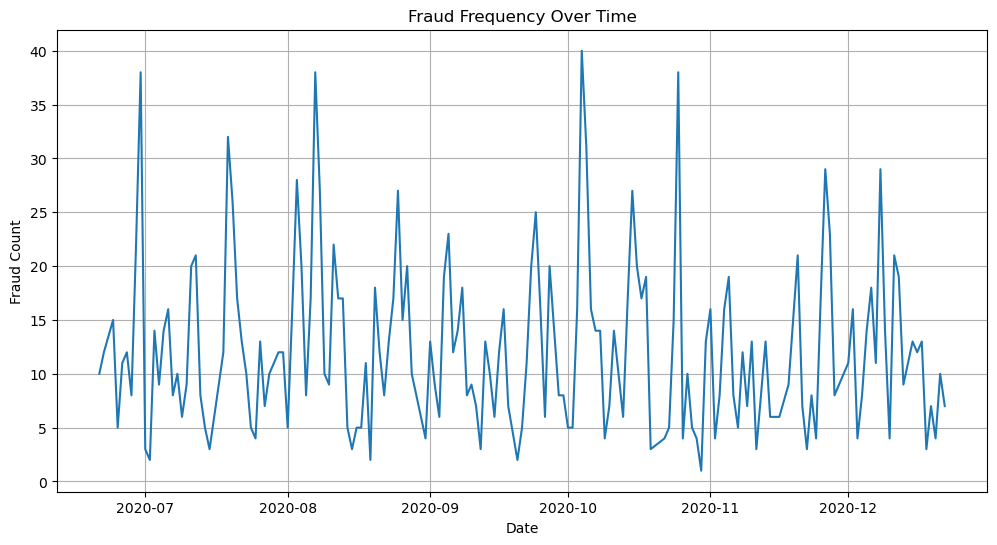

In [16]:
#line graph
df['transaction_date'] = pd.to_datetime(df['trans_date_trans_time'])
fraud_over_time = df[df['is_fraud'] == 1].groupby(df['transaction_date'].dt.date).size()
fraud_over_time.plot(figsize=(12, 6))
plt.title('Fraud Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Fraud Count')
plt.grid()
plt.show()


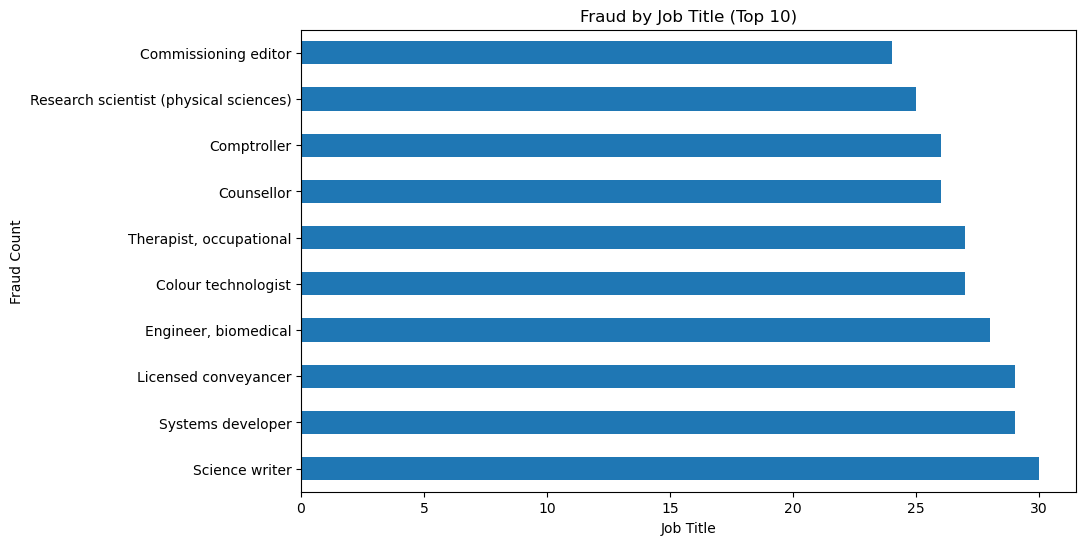

In [17]:
#bar plot
fraud_by_job = df[df['is_fraud'] == 1].groupby('job').size().sort_values(ascending=False).head(10)
fraud_by_job.plot(kind='barh', figsize=(10, 6))
plt.title('Fraud by Job Title (Top 10)')
plt.xlabel('Job Title')
plt.ylabel('Fraud Count')
plt.show()

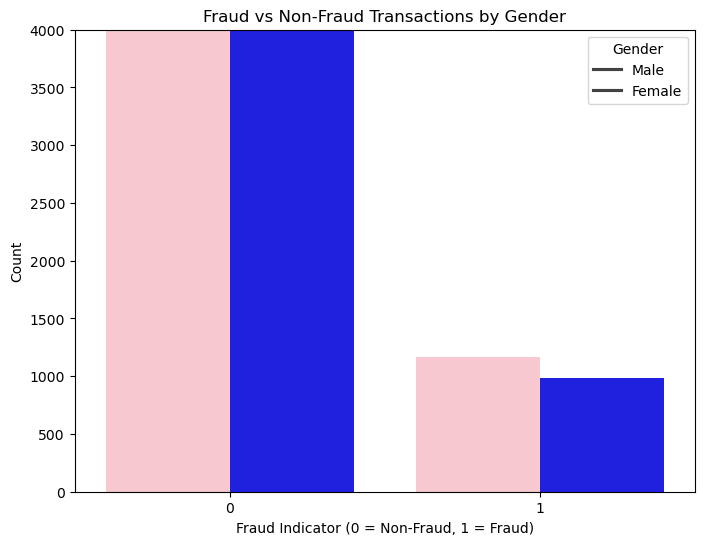

In [18]:
#count bar
grouped_data = df.groupby(['is_fraud', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='is_fraud', y='count', hue='gender', palette={'M': 'blue', 'F': 'pink'})
plt.title('Fraud vs Non-Fraud Transactions by Gender')
plt.xlabel('Fraud Indicator (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.ylim(0, 4000) #for zooming in
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


<Axes: >

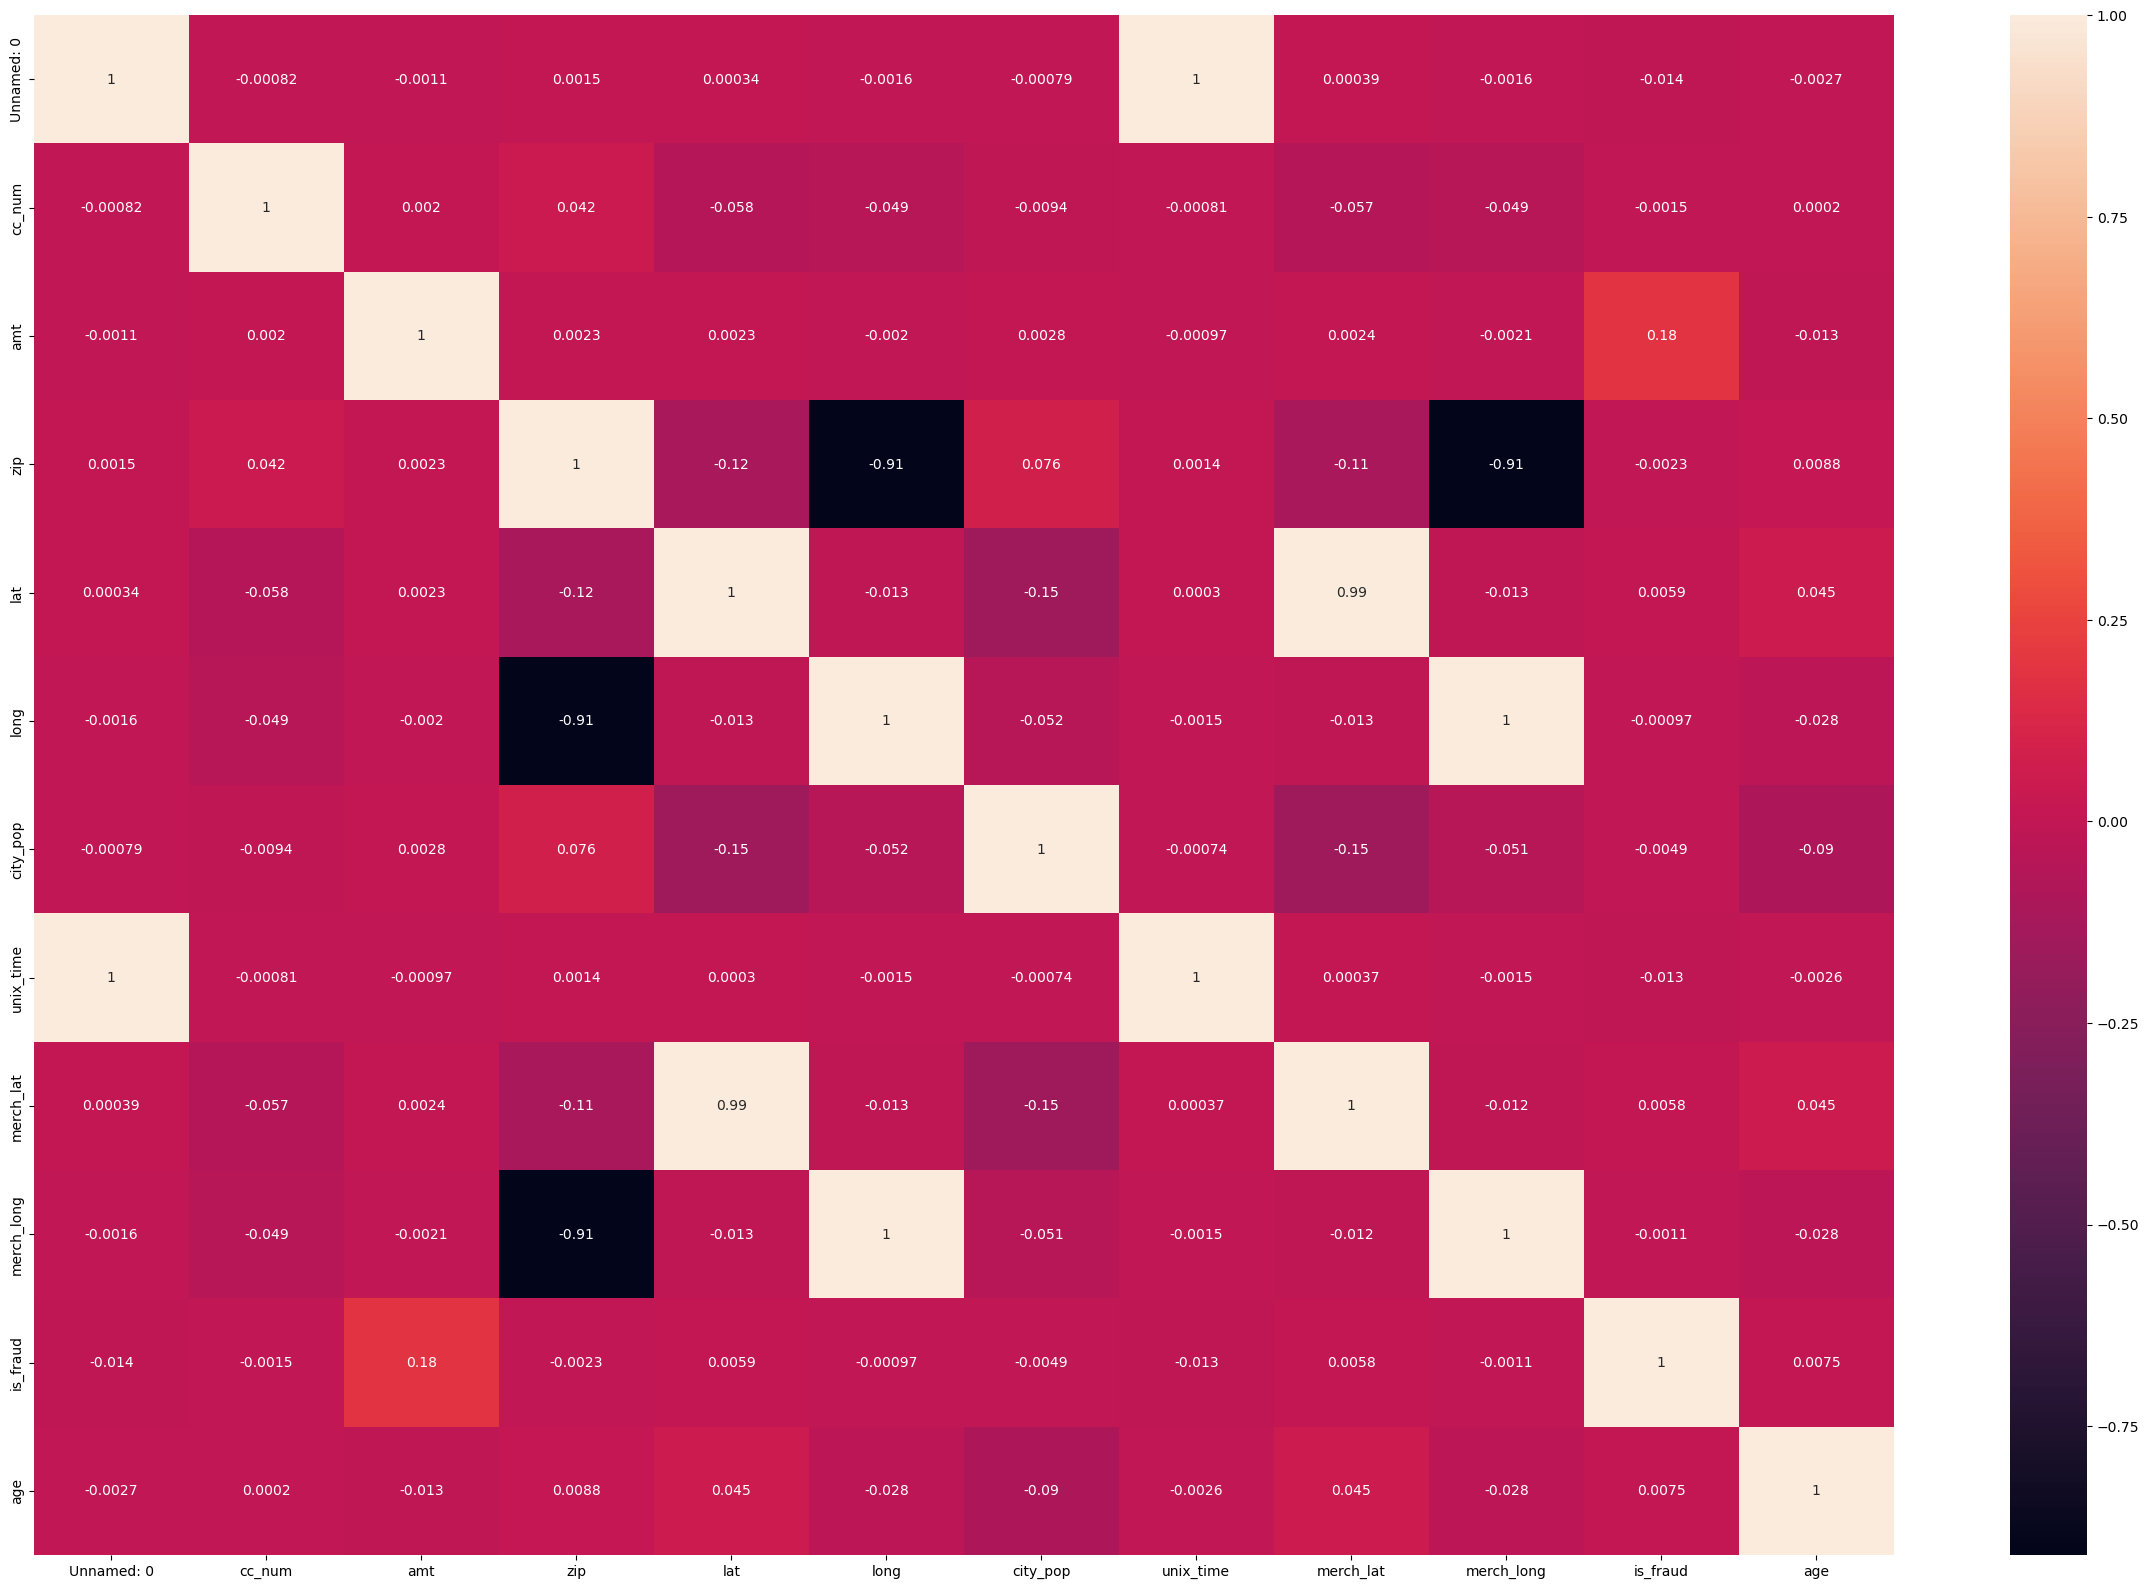

In [19]:
num_df = df.select_dtypes(include = 'number')
corr = num_df.corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True)   

In [20]:
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
age                               int32
transaction_date         datetime64[ns]


In [21]:
df = df.drop(['first', 'last', 'street', 'city', 'state', 
              'zip', 'cc_num', 'dob', 'trans_num', 
              'unix_time','Unnamed: 0','trans_date_trans_time','transaction_date'], axis = 1)

In [22]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [23]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes # 0 1 2 3

In [24]:
X = df.drop('is_fraud',axis = 1)
y= df['is_fraud']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Data Preprocessing Complete

<strong>Model Building</strong>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [29]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model_rfc = RandomForestClassifier()

In [30]:
model_lr.fit(X_train,y_train)
model_dt.fit(X_train,y_train)
model_knn.fit(X_train,y_train)
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)

In [32]:
lr_score = accuracy_score(y_test,y_pred_lr)
dt_score = accuracy_score(y_test,y_pred_dt)
knn_score = accuracy_score(y_test, y_pred_knn)
rfc_score = accuracy_score(y_test,y_pred_rfc)

print(f'Logistic Regression            :{lr_score}')
print(f'Decision Tree Classifier       :{dt_score}')
print(f'K-Nearest Neighbors Classifier :{knn_score}')
print(f'RandomForest Classifier        :{rfc_score}')

Logistic Regression            :0.9958612250773771
Decision Tree Classifier       :0.996958900165551
K-Nearest Neighbors Classifier :0.9964430528563545
RandomForest Classifier        :0.998068571702776


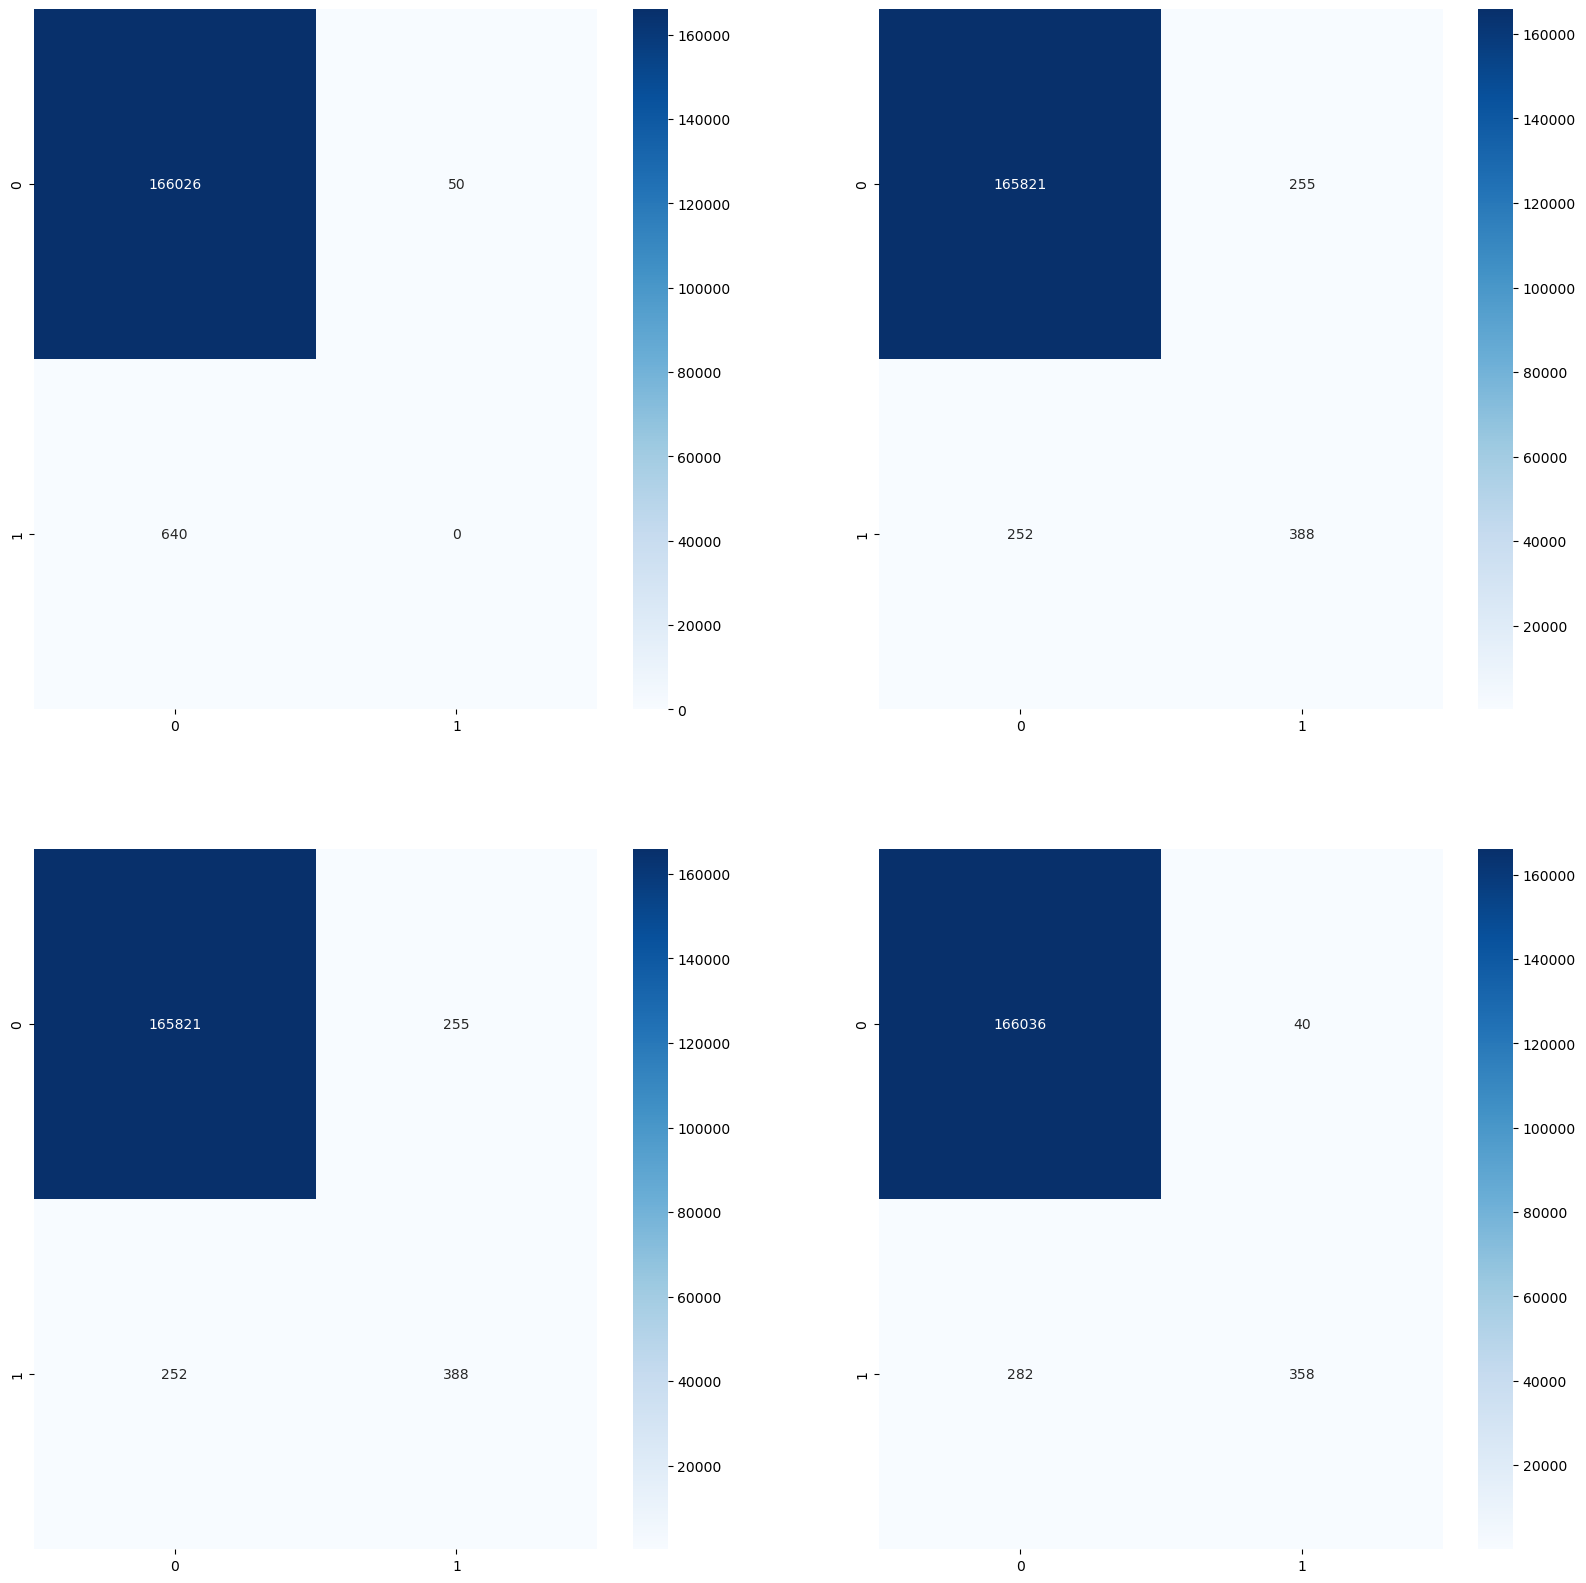

In [33]:
fig, axes = plt.subplots(2,2, figsize=(20,20))

cfm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cfm,annot=True,ax=axes[0,0],cmap='Blues',fmt='d')

cfm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cfm,annot=True,ax=axes[0,1],cmap='Blues',fmt='d')

cfm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cfm,annot=True,ax=axes[1,0],cmap='Blues',fmt='d')

cfm = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cfm,annot=True,ax=axes[1,1],cmap='Blues',fmt='d')

plt.show()

<strong>Conclusion</strong>

In this project, we explored a comprehensive dataset of credit card transactions to predict fraudulent activities. Our primary goal was to identify patterns and trends that could aid in fraud detection and enhance the accuracy of prediction models.
We employed four prediction models in our analysis, comparing their performance to determine the most effective approach for detecting fraud. 
The insights gained from this project underscore the critical role of predictive modeling and data preprocessing in combating credit card fraud and enhancing the reliability of fraud detection systems.
